# Preprocessing steps for an EEG
- Load the data
- Print information about the data
- load the annotations using scripts from suzanne in matlab via matlab engine
- add the annotations to the file
- check the file visually ('bad' annotations can be added here for artifacts)
- check the psd of the eeg channels
- filter between 0.5 and 35 hz
- resample to 100hz sampling freq
- recheck psd and data
- save file to fif format

## Set up environment

In [35]:
from PreprocessingFunctions import *

In [36]:
mne.set_config('MNE_BROWSER_BACKEND', 'qt')
# if error on linux see the following link: https://web.stanford.edu/dept/cs_edu/resources/qt/install-linux

In [37]:
mne.set_log_level(verbose='WARNING')

## Load data

In [38]:
sampleSignalPath = '/path/to/edf/sample.edf'
annot_path = sampleSignalPath.replace('original.edf', 'annot-sz.mat')  # works only if there is allready an existing annotation
out_path = sampleSignalPath.replace('original.edf', 'preprocessed-raw.fif')
raw = mne.io.read_raw(sampleSignalPath)

In [45]:
raw = raw.pick_types(eeg=True)
print(raw)
print(raw.info)
print(raw.ch_names)
print(raw.info['subject_info'])

<RawEDF | sub-021_task-Absence_preprocessed-raw.edf, 24 x 121000 (1210.0 s), ~24 kB, data not loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp2-Ref1, EEG Fp1-Ref1, EEG F8-Ref1, EEG F7-Ref1, EEG ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 35.0 Hz
 meas_date: 2010-09-08 14:13:54 UTC
 nchan: 24
 projs: []
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>
['EEG Fp2-Ref1', 'EEG Fp1-Ref1', 'EEG F8-Ref1', 'EEG F7-Ref1', 'EEG F4-Ref1', 'EEG F3-Ref1', 'EEG T4-Ref1', 'EEG T3-Ref1', 'EEG C4-Ref1', 'EEG C3-Ref1', 'EEG T6-Ref1', 'EEG T5-Ref1', 'EEG P4-Ref1', 'EEG P3-Ref1', 'EEG O2-Ref1', 'EEG O1-Ref1', 'EEG Fz-Ref1', 'EEG Cz-Ref1', 'EEG Pz-Ref1', 'EEG A2-Ref1', 'EEG A1-Ref1', 'EEG Cb2-Ref2', 'In1-Ref3', 'EEG Res-Ref4']
{'his_id': 'X', 'sex': 0, 'last_name': 'X', 'birthday': (2005, 2, 1)}


## Extract info about data

In [49]:
raw = update_annotations_suzanne(raw, annot_path, sampleSignalPath, method='replace')
# be aware that this needs to have matlab set up with the script accessible otherwise it will fail, also needs matlab engine for python to work

## First visual inspection of the data

In [51]:
raw.plot(duration=20, remove_dc=False, block=True, show_options=True)

In [52]:
raw.compute_psd(fmax=70, remove_dc=False).plot(average='mean', picks='eeg')

## Load the data and filter it

In [53]:
l_freq = 0.5 #if should not be changed use raw.info['highpass']
h_freq = 35 #if should not be changed use raw.info['lowpass']
sfreq = 100 #if should not be changed use raw.info['sfreq']

In [54]:
raw_unfiltered = raw.copy()
raw.load_data()
raw.filter(l_freq=l_freq,h_freq=h_freq)

Measurement date,"September 08, 2010 14:13:54 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,24 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.50 Hz
Lowpass,35.00 Hz


In [55]:
raw.resample(sfreq)

Measurement date,"September 08, 2010 14:13:54 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,24 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.50 Hz
Lowpass,35.00 Hz


/home/soenke/Thesis/Thesis_code/.venv/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


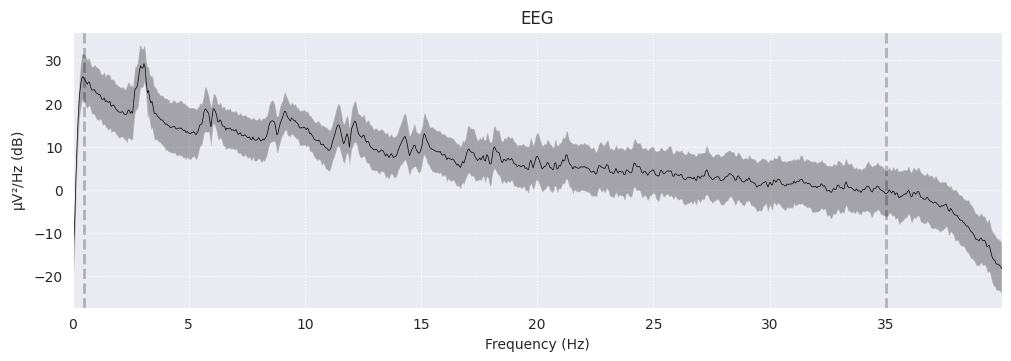

In [56]:
raw.compute_psd(fmax=40, remove_dc=False, picks='eeg').plot(average='mean')

In [57]:
raw.plot(duration=20, remove_dc=False, block=True, show_options=True)

In [58]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp2-Ref1, EEG Fp1-Ref1, EEG F8-Ref1, EEG F7-Ref1, EEG ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 35.0 Hz
 meas_date: 2010-09-08 14:13:54 UTC
 nchan: 24
 projs: []
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>


## Check different montages

In [65]:
raw_remontaged = raw.copy()
print(f'Allready bypolar montage: {only_keep_10_20_channels_and_check_bipolar(raw_remontaged)}')
raw_remontaged = change_montage(raw=raw_remontaged.pick(picks='eeg', exclude='bads'), montage='doublebanana')

ic| mne.set_bipolar_reference(inst=raw_internal, anode=anode_eeg_channels, cathode=cathode_eeg_channels,
                              ch_name=new_names, copy=False): <RawEDF | sub-021_task-Absence_preprocessed-raw.edf, 20 x 121000 (1210.0 s), ~18.5 MB, data loaded>


Allready bypolar montage: False


In [66]:
print(raw_remontaged.info)

<Info | 10 non-empty values
 bads: []
 ch_names: In1-Ref3, EEG Res-Ref4, Fp2-F8, F8-T4, T4-T6, T6-O2, Fp2-F4, ...
 chs: 20 EEG
 custom_ref_applied: True
 dig: 0 items
 highpass: 0.5 Hz
 lowpass: 35.0 Hz
 meas_date: 2010-09-08 14:13:54 UTC
 nchan: 20
 projs: []
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>


In [67]:
raw_remontaged.plot(duration=20, remove_dc=False, block=True, show_options=True)

# Save Data

In [68]:
raw.save(out_path, overwrite=False)

OSError: The filename (/media/soenke/7FDD-F716/Thesis/Data/Absence_newAnnot_BIDS/sub-021/eeg/sub-021_task-Absence_preprocessed-raw.edf) for file type raw must end with .fif or .fif.gz